# Predictions statistics

Analysis of the predictions made for a certain datasplit (usually test).

**Note:** To run this notebook you previously have to run and save the predictions on a test dataset **with ground-truth values**. See the Datasplit section in [3.0 notebook](./3.0-Computing_predictions.ipynb#Predicting-a-datasplit-txt-file) for reference.


In [1]:
import os
import json
import numpy as np

from imgclas.data_utils import load_image
from imgclas import paths, plot_utils

import warnings
warnings.filterwarnings("ignore")

# User parameters to set
TIMESTAMP = '2023-06-22_171209'       # timestamp of the model              
SPLIT_NAME = 'test'                   # dataset split to predict
MODEL_NAME = 'final_model.h5'         # model to use to make the mediction

# Set the timestamp
paths.timestamp = TIMESTAMP

# Load back the predictions
pred_path = os.path.join(paths.get_predictions_dir(), '{}+{}.json'.format(MODEL_NAME, SPLIT_NAME))
with open(pred_path) as f:
    pred_dict = json.load(f)

## Computing the metrics

Check [sklearn](https://scikit-learn.org/stable/modules/classes.html#classification-metrics) for more regression metrics.

In [2]:
from imgclas import test_utils
import sklearn.metrics as metrics

y, yhat = np.array(pred_dict['true_value']), np.array(pred_dict['pred_value'])

mae = metrics.mean_absolute_error(y, yhat)
mse = metrics.mean_squared_error(y, yhat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,yhat)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 9.688515852760965
MSE: 170.70173112657926
RMSE: 13.065287257713825
R-Squared: 0.9351159380497004


## Violin plots

In [3]:
def get_bin(true_values):
    
    grams = [100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375]
    bins = [87.5, 112.5, 137.5, 162.5, 187.5, 212.5, 237.5, 262.5, 287.5, 312.5, 337.5, 362.5, 387.5]
    
    result = list()
    for e in true_values:
        l = len(bins)
        index = 0
        for i in range(l):
            if bins[i] < e and bins[i+1] > e:
                index = i
                result.append(grams[index])
                break
    
    return result
    

In [4]:
# plotly figure

import plotly.graph_objects as go

import pandas as pd

df = pd.DataFrame(data={'true_volume': pred_dict['true_value'], 'pred_volume': pred_dict['pred_value'], 'bin': get_bin(pred_dict['true_value'])})


#fig = go.Figure()

volumes = [100, 125, 150, 175, 200, 225, 250, 275, 300, 325]


#for vol in volumes:
#    fig.add_trace(go.Violin(x=df['true_volume'][df['true_volume'] == vol],
#                            y=df['pred_volume'][df['true_volume'] == vol],
#                            name=vol,
#                            box_visible=True,
#                            meanline_visible=True))
#fig.update_traces(meanline_visible=True,
#                  points='all', # show all points
#                  jitter=0.05,  # add some jitter on points for better visibility
#                  scalemode='count') #scale violin plot area with total count
#fig.update_layout(
#    title_text="Predicted volumes distribution")
    
#fig.write_image("/srv/image-results/violin_plot.png")

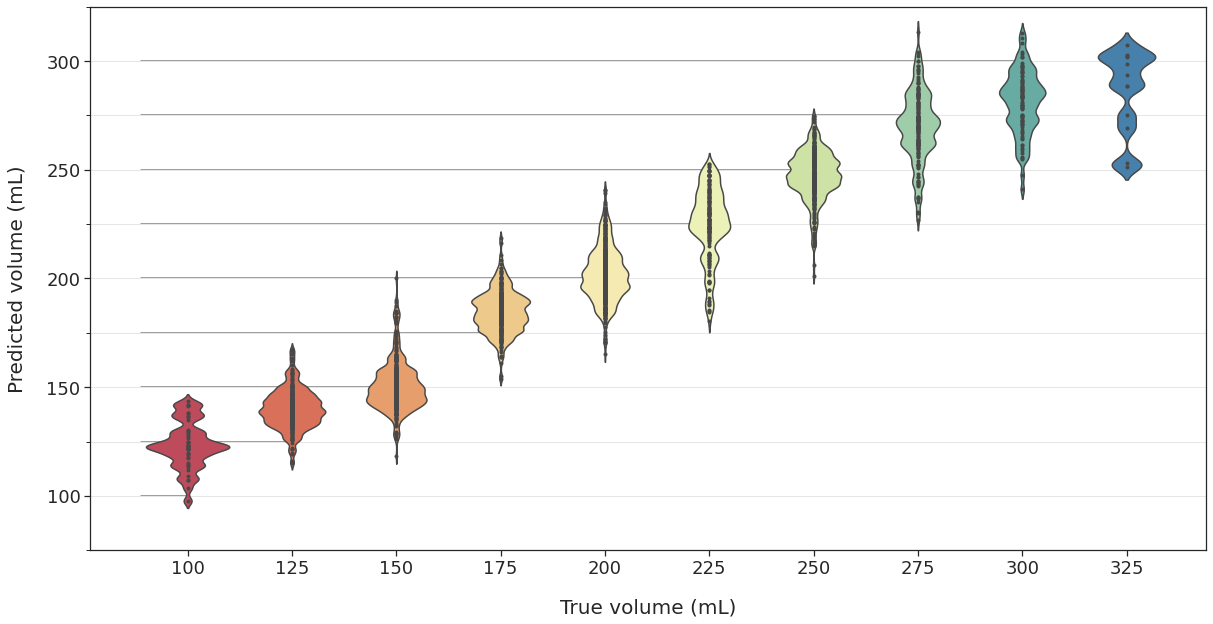

In [8]:
# seaborn figure

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

sns.set_theme()
sns.set_style(style='white') 

fig, ax = plt.subplots(1,1)
    
sns.violinplot(x='bin',
                    y='pred_volume',
                    data=df, inner="points",
                    palette="Spectral",
               scatter_kws={"zorder":10},
               ax=ax,
               bw=.15, #not smooth
              )

for i, v in enumerate(volumes):
    xrange = np.linspace(-0.45, i, 100)
    ax.plot(xrange, [v]*len(xrange), zorder=-1, color='0.5')
#     sns.lineplot(xrange, [v]*len(xrange), color='0.5', ax=ax)
    
# ax.set(xlabel='True volume (mL)', ylabel='Predicted volume (mL)')
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.set_xlabel(xlabel='True volume (mL)', labelpad=20, fontsize=20)
ax.set_ylabel(ylabel='Predicted volume (mL)', labelpad=20, fontsize=20)
# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
# sns.boxplot(x='true_volume', y='pred_volume', data=df, palette='rainbow', width=0.3,
#             boxprops={'zorder': 2}, ax=ax)
# plt.title("Predicted volumes distribution", fontsize=22)
# For the minor ticks, use no labels; default NullFormatter.
ax.yaxis.set_minor_locator(MultipleLocator(25))
plt.grid(axis='y', which='both', color='0.9')
plt.rcParams["figure.figsize"] = (20,10)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
    
plt.ylim([75, 325])
plt.setp(ax.collections, alpha=1)
# plt.scatter(x=range(len(volumes)),y=volumes, c="powderblue",              marker='X', s=100, edgecolor='navy')
#plt.savefig('/srv/image-results/violin_plot_general.pdf',bbox_inches='tight')
plt.show()

In [ ]:

for i, v in enumerate(volumes):
    xrange = np.linspace(-0.45, i, 100)
    ax.plot(xrange, [v]*len(xrange), zorder=-1, color='0.5')
#     sns.lineplot(xrange, [v]*len(xrange), color='0.5', ax=ax)
    
# ax.set(xlabel='True volume (mL)', ylabel='Predicted volume (mL)')
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.set_xlabel(xlabel='True volume (mL)', labelpad=20, fontsize=20)
ax.set_ylabel(ylabel='Predicted volume (mL)', labelpad=20, fontsize=20)
# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
# sns.boxplot(x='true_volume', y='pred_volume', data=df, palette='rainbow', width=0.3,
#             boxprops={'zorder': 2}, ax=ax)
# plt.title("Predicted volumes distribution", fontsize=22)
# For the minor ticks, use no labels; default NullFormatter.
ax.yaxis.set_minor_locator(MultipleLocator(25))
plt.grid(axis='y', which='both', color='0.9')
plt.rcParams["figure.figsize"] = (20,10)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
    
plt.ylim([0, 325])
plt.setp(ax.collections, alpha=1)
# plt.scatter(x=range(len(volumes)),y=volumes, c="powderblue",              marker='X', s=100, edgecolor='navy')
#plt.savefig('/srv/image-results/violin_plot_general.pdf',bbox_inches='tight')
plt.show()